In [1]:
from scipy.optimize import minimize
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

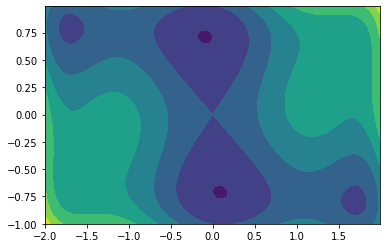

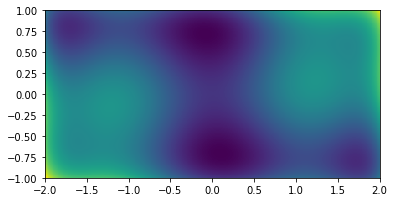

In [2]:
def six_hump_camelback(params):
    x, y = params
    z = (4 - 2.1*(x**2) + (x**4)/3)*(x**2) + x*y + (4*(y**2) - 4)*(y**2)
    return z

x = np.arange(-2, 2, 0.01)
y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(x, y, sparse=True)
z = six_hump_camelback((X, Y))

h = plt.contourf(x, y, z)

extent = [-2, 2, -1, 1] #min max of x, y
pylab.figure()
pylab.imshow(z, interpolation = 'nearest', origin = "lower", extent = extent)
pylab.show()

In [3]:
# From the figures, we can see that 2 global minima exists. 
# First global minima is at ~(-0.1, 0.75) and the second global minima is at ~(0.1, -0.75)

starting_point1 = [-0.2, 0.65] # a random starting point that is close to the one of the global minima in the figure
result1 = optimize.basinhopping(six_hump_camelback, starting_point1, stepsize = 0.1)
print("The starting point: ", starting_point1, "Function Value at Global Minima: ", result1.fun, "with [x, y]: ", result1.x)

starting_point2 = [0.2, -0.65] # a random starting point that is close to the one of the global minima in the figure
result2 = optimize.basinhopping(six_hump_camelback, starting_point2, stepsize = 0.1)
print("The starting point: ", starting_point2, "Function Value at Global Minima: ", result2.fun, "with [x, y]: ", result2.x)

The starting point:  [-0.2, 0.65] Function Value at Global Minima:  -1.0316284534898772 with [x, y]:  [-0.08984202  0.7126564 ]
The starting point:  [0.2, -0.65] Function Value at Global Minima:  -1.0316284534898774 with [x, y]:  [ 0.08984201 -0.7126564 ]


In [4]:
starting_point3 = [0, 0]
result3 = optimize.basinhopping(six_hump_camelback, starting_point3, stepsize = 0.1)
print("The starting point: ", starting_point3, "Function Value: ", result3.fun, "[x, y]: ", result3.x)

result_zero = optimize.minimize(six_hump_camelback,(0,0))
print("Minimize() starting with [0, 0] gives ", result_zero.fun, " value as the result of the function and ", result_zero.x, " as the [x, y]")

# Basinhopping with starting point of [0, 0] still hits one of the same global minima with the other 2 starting points.
# When I tested with minimize(), the calculation ended in the first step.
# This may be happening because starting point of [0, 0] hits to the local minima.

# At the end, we can say that there are only 2 global minima here.

The starting point:  [0, 0] Function Value:  -1.031628453489877 [x, y]:  [-0.08984202  0.7126564 ]
Minimize() starting with [0, 0] gives  0.0  value as the result of the function and  [0. 0.]  as the [x, y]


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

popt max:  [23.09207141  5.73581557  2.29443164 15.77934501]

pcov max:
 [[ 1.32867535e+00 -1.60423832e-03  1.01480460e-01 -1.08340989e+00]
 [-1.60423832e-03  6.31514259e-03 -2.12233078e-04  1.91648216e-03]
 [ 1.01480460e-01 -2.12233078e-04  2.75441452e-02 -1.70935422e-01]
 [-1.08340989e+00  1.91648216e-03 -1.70935422e-01  1.38433748e+00]]


popt min:  [ 52.64929244   6.16452594   1.97590023 -61.32093749]

pcov min:
 [[ 1.96936391e+00 -8.73505990e-04  2.27187852e-02 -1.05130554e+00]
 [-8.73505990e-04  2.22850049e-03 -4.92554928e-05  1.09102020e-03]
 [ 2.27187852e-02 -4.92554928e-05  5.77327917e-03 -7.06520995e-02]
 [-1.05130554e+00  1.09102020e-03 -7.06520995e-02  1.41330971e+00]]


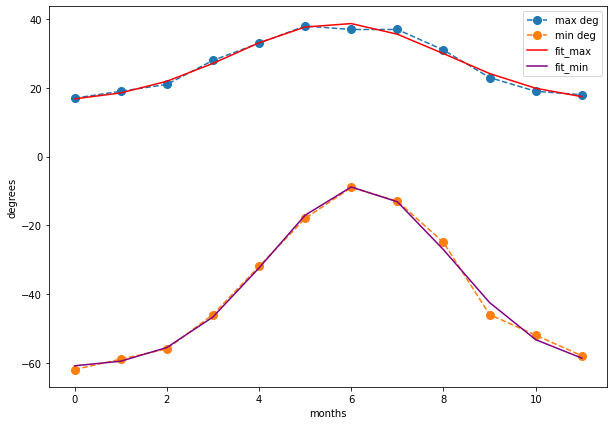

In [5]:
max_deg = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_deg = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel("degrees")
plt.xlabel("months")

plt.plot(range(0,12), max_deg, marker="o", markersize = 8, label = "max deg", linestyle = 'dashed')
plt.plot(range(0,12), min_deg, marker="o", markersize = 8, label = "min deg", linestyle = 'dashed')


def gaussian(x, A, x0, sigma, d):
    return A * np.exp( -(x - x0)**2 / (2 * sigma**2)) + d

mean_max = sum(np.arange(12) * max_deg) / sum(max_deg)
sigma_max = np.sqrt(sum(max_deg * (np.arange(12) - mean_max)**2) / sum(max_deg))
popt_max, pcov_max = optimize.curve_fit(gaussian, np.arange(12), max_deg, p0 = [max(max_deg), mean_max, sigma_max, 0])
print("popt max: ", popt_max)
print("\npcov max:\n", pcov_max)

mean_min = sum(np.arange(12) * min_deg)/sum(min_deg)
sigma_min = np.sqrt(sum(min_deg * (np.arange(12) - mean_min)**2) / sum(min_deg))
popt_min, pcov_min = optimize.curve_fit(gaussian, np.arange(12), min_deg, p0 = [max(min_deg), mean_min, sigma_min, 0])
print("\n\npopt min: ", popt_min)
print("\npcov min:\n", pcov_min)

plt.plot(range(0,12), gaussian(range(0,12), *popt_max), color = "red", label = "fit_max")
plt.plot(range(0,12), gaussian(range(0,12), *popt_min), color = "purple", label = "fit_min")
plt.legend()
plt.show()

# As we can see from the plot, the fit is reasonable. Popt and cov matrix are also meaningful.
# Time offset for min and max temperatures within the fit accuracy is not the same.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Parameters found with curve_fit:  [ 7.98778358e+02 -8.46729870e-02  2.11077481e-01  2.52665238e+01]


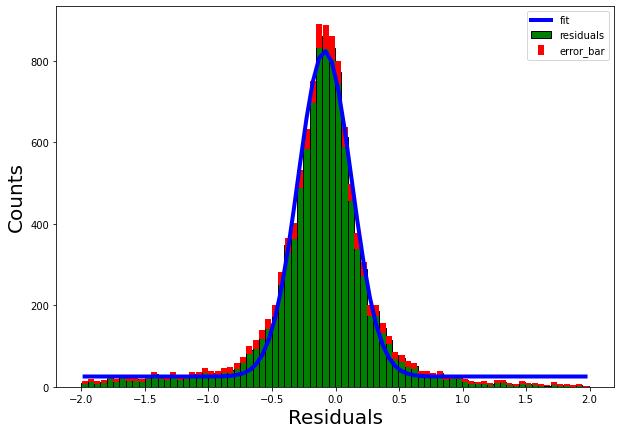

chi2:  633.1163725164477 p_value:  0.0
P value is smaller than 0.05. The fit is not satisfactory


In [6]:
df = pd.DataFrame(dict(pd.read_pickle('residuals_261.pkl').item()))

# clearing the data as we did in the past examples
df = df.loc[df["residuals"] < 2]
df = df.loc[df["residuals"] > -2]

residuals = df['residuals']

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlabel("Residuals", fontsize = 20)
ax.set_ylabel("Counts", fontsize = 20)
h, bins, patches = plt.hist(residuals, bins = 80, color = 'g', label = 'residuals', edgecolor = "black")

poission_err = np.sqrt(h)
bin_c = (bins[1:] + bins[:-1]) / 2
ax.errorbar(x = bin_c, y = h, yerr = poission_err, elinewidth = 6, color = "red", linestyle = "None", label = "error_bar")

def gaussian(x, A, x0, sigma, d):
    return A * np.exp( -(x - x0)**2 / (2 * sigma**2)) + d

mean, sigma = stats.norm.fit(h)
popt, _ = optimize.curve_fit(gaussian, bin_c, h, p0 = [max(h), mean, sigma, 0])
print("Parameters found with curve_fit: ", popt)
plot_x = bin_c
plot_y = gaussian(bin_c, *popt)
ax.plot(plot_x, plot_y, 'blue', linewidth = 4, label = "fit")
plt.legend()
plt.show()

# goodness of fit
def calculate_p(obs, exp, cdof):
    chi2 = np.sum(((obs - exp)**2) / cdof)
    p_value = 1. - stats.chi2.cdf(chi2, cdof)
    return chi2, p_value

exp = gaussian(bin_c ,*tuple(popt))
cdof = len(bin_c) - 1


chi2, p_value = calculate_p(h, exp, cdof)
print("chi2: ", chi2, "p_value: ", p_value)
print("P value is smaller than 0.05. The fit is not satisfactory")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Optimal Parameters:  [-9.96203467 12.33174286  9.26282131]

Cov matrix:
 [[ 1.75558202e-02  9.86007919e-07 -2.76510342e-06]
 [ 9.86007919e-07  1.77329886e-04  5.40552783e-08]
 [-2.76510342e-06  5.40552783e-08  8.78853325e-03]]

The overall avg. temperature is:  9.262821312957865

Daily average values of coldest/hottest time of year are:  -0.6992133594195042  /  19.224855985335232


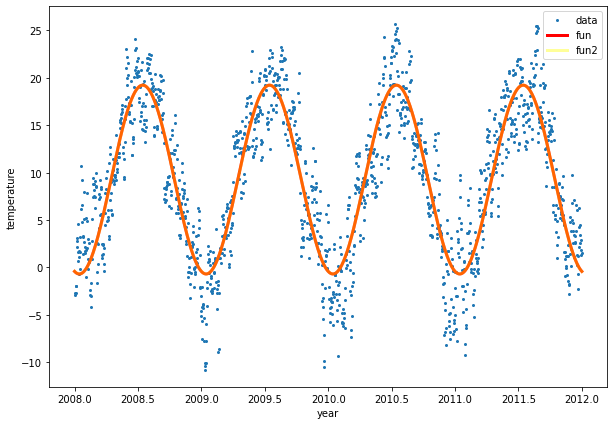

SSR1:  18662.47749843538  SSR2:  18663.718123463917
CL: 1.000 , additional parameter necessary: NO


In [7]:
from scipy.stats import f

df = pd.read_csv("munich_temperatures_average_with_bad_data.txt", sep = ' ', names = ['date','temperature'])

df = df[(df['temperature'] < 80) & (df['date'] < 2012) & (df['date'] >= 2008)]
date = df["date"]
temperature = df["temperature"]

def fun(t, A, b, c):
    return A * np.cos(2 * np.pi * t + b) + c

popt, pcov = optimize.curve_fit(fun, date, temperature)

fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel("temperature")
plt.xlabel("year")
plt.plot(date, temperature, marker="o", markersize = 2, label = "data", linestyle = "None")

x_lin = np.linspace(2008, 2012, len(temperature))
y = fun(x_lin, *popt)
plt.plot(x_lin, y, color='red', linewidth = 3, label = "fun")

print("Optimal Parameters: ", popt)
print("\nCov matrix:\n", pcov)
print("\nThe overall avg. temperature is: ", popt[2])
print("\nDaily average values of coldest/hottest time of year are: ", (popt[2] + popt[0]), " / ", (popt[2] - popt[0]))

def fun2(t, A, b, c, d):
    return A * np.cos(2 * np.pi * t * b + c) + d

# here, b is the shift parameter. It expands the limit of the function. 
# Without b, we assume that t = 0 every year. But in reality, 
# it is not possible to perform the calculation at the exact same time.

popt2, pcov2 = optimize.curve_fit(fun2, date, temperature)
y2 = fun2(x_lin, *popt2)
plt.plot(x_lin, y2, color='yellow', linewidth = 3, label = "fun2", alpha = 0.4)
plt.legend()
plt.show()

ssr_1 = np.sum((y - temperature)**2)
ssr_2 = np.sum((y2 - temperature)**2)
print("SSR1: ", ssr_1, " SSR2: ", ssr_2)

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
cl_1_2 = Ftest(ssr_1, ssr_2, 2, 3, len(temperature), verbose=True)

# In the plot, we can see that fun and fun2 are exactly at the same spot. 
# That means, we do not need an extra paramater, fun can correctly approximate the data.